## Classifying images through Decision Tree
- Data preprocessing process

  1. Normalize the image data by dividing it by 255

  2. Store the average value of an array of R, G, and B per image

  3. Separate train and test, train only with a train set, and test performance with a test set

## GDrive Mount

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## 1. Import library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as pilimg
import os
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input

import random
import pickle
import cv2
import matplotlib

from glob import glob
from numpy import random
from PIL import Image

## 2. copy files and unzip

In [ ]:
# copy
!cp '/gdrive/MyDrive/RGB_DATA/red_data.zip' ./
!cp '/gdrive/MyDrive/RGB_DATA/blue_data.zip' ./
!cp '/gdrive/MyDrive/RGB_DATA/green_data.zip' ./

In [ ]:
! cp '/gdrive/MyDrive/RGB_DATA/실험.zip' ./ # orange pi data

In [ ]:
# unzip
!unzip red_data.zip
!unzip blue_data.zip
!unzip green_data.zip

In [ ]:
!unzip 실험.zip

## 3. Data processing

### 3.1 red data

In [ ]:
red_count = len(os.listdir('red_data'))
red_count

7018

In [ ]:
# red_data
red_tmp = glob('red_data/*.jpeg')
print(len(red_tmp))

red_list = []
for img in red_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255

    y = 64
    h = 128
    x = 64
    w = 128
    crop_img = img[y: y + h, x: x + w]

    red_avg = np.mean(crop_img[:, :, 0])
    green_avg = np.mean(crop_img[:, :, 1])
    blue_avg = np.mean(crop_img[:, :, 2])

    red_list.append(np.array([red_avg, green_avg, blue_avg]))

red_data = np.array(red_list) # red label = 0
red_data.shape

7018


(7018, 3)

In [ ]:
# train and test split
red_train, red_test = train_test_split(red_data, test_size=0.1, shuffle=True, random_state=42)

### 3.2 green data

In [ ]:
green_count = len(os.listdir('green_data'))
green_count

7018

In [ ]:
# green_data
green_tmp = glob('green_data/*.jpeg')
print(len(green_tmp))

green_list = []
for img in green_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255

    y = 64
    h = 128
    x = 64
    w = 128
    crop_img = img[y: y + h, x: x + w]

    red_avg = np.mean(crop_img[:, :, 0])
    green_avg = np.mean(crop_img[:, :, 1])
    blue_avg = np.mean(crop_img[:, :, 2])

    green_list.append(np.array([red_avg, green_avg, blue_avg]))

green_data = np.array(green_list) # green label = 1, 이후에..
green_data.shape

7018


(7018, 3)

In [ ]:
green_train, green_test = train_test_split(green_data, test_size=0.1, shuffle=True, random_state=42)

### 3.3 Blue Data

In [ ]:
blue_count = len(os.listdir('blue_data'))
blue_count

7018

In [ ]:
# blue_data
blue_tmp = glob('blue_data/*.jpeg')
print(len(blue_tmp))

blue_list = []
for img in blue_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255

    y = 64
    h = 128
    x = 64
    w = 128
    crop_img = img[y: y + h, x: x + w]

    red_avg = np.mean(crop_img[:, :, 0])
    green_avg = np.mean(crop_img[:, :, 1])
    blue_avg = np.mean(crop_img[:, :, 2])
    
    blue_list.append(np.array([red_avg, green_avg, blue_avg]))

blue_data = np.array(blue_list) # blue label = 2, 이후에..
blue_data.shape

7018


(7018, 3)

In [ ]:
blue_train, blue_test = train_test_split(blue_data, test_size=0.1, shuffle=True, random_state=42)

## 4. labeling

In [ ]:
len(red_train)

6316

In [ ]:
# red train, test label
red_train_label = np.zeros(len(red_train))
red_test_label = np.zeros(len(red_test))

# green train, test label
green_train_label = np.zeros(len(green_train))
for i in range(len(green_train)):
  green_train_label[i] = 1

green_test_label = np.zeros(len(green_test))
for i in range(len(green_test)):
  green_test_label[i] = 1

# blue train, test label
blue_train_label = np.zeros(len(blue_train))
for i in range(len(blue_train)):
  blue_train_label[i] = 2

blue_test_label = np.zeros(len(blue_test))
for i in range(len(blue_test)):
  blue_test_label[i] = 2

print(red_train_label.shape)
print(green_train_label.shape)
print(blue_train_label.shape)

print(red_test_label.shape)
print(green_test_label.shape)
print(blue_test_label.shape)

(6316,)
(6316,)
(6316,)
(702,)
(702,)
(702,)


In [ ]:
print(green_train_label) # check

[1. 1. 1. ... 1. 1. 1.]


In [ ]:
# Concatenate data
X = np.concatenate([red_train, green_train, blue_train])
X.shape

(18948, 3)

In [ ]:
y = np.concatenate([red_train_label, green_train_label, blue_train_label])

In [ ]:
y.shape

(18948,)

## 5. Modeling

In [ ]:
# hyperparameter
from sklearn import tree
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 'max_depth' : [10, 12, 14, 16, 18, 20, 22, 24, 32], 'criterion' : ['gini', 'entropy']}
]
decisiontree_model = tree.DecisionTreeClassifier()

grid_search = GridSearchCV(decisiontree_model, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'criterion': 'entropy', 'max_depth': 18}
DecisionTreeClassifier(criterion='entropy', max_depth=18)


In [ ]:
best_decisiontree = tree.DecisionTreeClassifier(max_depth=18, criterion='entropy')
best_decisiontree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=18)

### 6. Result & Visualization for data analysis

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores, fit_times, _ =\
    learning_curve(best_decisiontree, X, y,
                   cv=5, train_sizes=np.linspace(0.1, 1.0, 6),
                   scoring = 'accuracy',
                   return_times=True)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

Text(0.5, 1.0, 'Decision Tree Model Accuracy Curve')

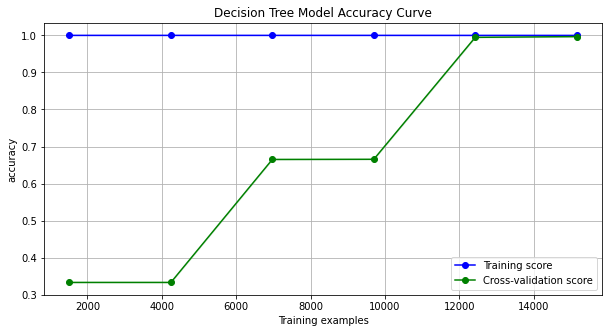

In [ ]:
_, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.grid()
axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
train_scores_mean + train_scores_std, alpha=0.1,
color="b")
axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std, alpha=0.1,
color="g")
axes.plot(train_sizes, train_scores_mean, 'o-', color="b",
label="Training score")
axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
label="Cross-validation score")
axes.legend(loc="best")
axes.set_xlabel("Training examples")
axes.set_ylabel("accuracy")
axes.set_title("Decision Tree Model Accuracy Curve")

In [ ]:
X_test = np.concatenate([red_test, green_test, blue_test])
print(X_test.shape)

y_test = np.concatenate([red_test_label, green_test_label, blue_test_label])
print(y_test.shape)

(2106, 3)
(2106,)


In [ ]:
#predict_labels = best_decisiontree.predict(X_test)
predict_labels = load_decisiontree.predict(X_test)
print(predict_labels)
predict_labels.shape

[0. 0. 0. ... 2. 2. 2.]


(2106,)

In [ ]:
from sklearn import metrics

print('Accuracy:',metrics.accuracy_score(y_test, predict_labels))
print("")
print(metrics.confusion_matrix(y_test, predict_labels))
print("")
print('Precision:',metrics.precision_score(y_test, predict_labels, average=None))
print("")
print('Recall:',metrics.recall_score(y_test, predict_labels, average=None))
print("")
print('F1:',metrics.f1_score(y_test, predict_labels, average=None))

Accuracy: 0.9947768281101614

[[700   1   1]
 [  1 696   5]
 [  0   3 699]]

Precision: [0.99857347 0.99428571 0.99148936]

Recall: [0.997151   0.99145299 0.9957265 ]

F1: [0.99786172 0.99286733 0.99360341]


In [ ]:
import joblib

# check load model
load_decisiontree = joblib.load("best_decisiontree (2).pkl")

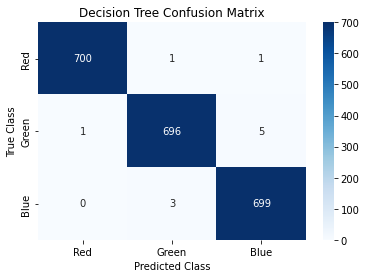

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, predict_labels)
LABELS = ['Red', 'Green', 'Blue']

sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

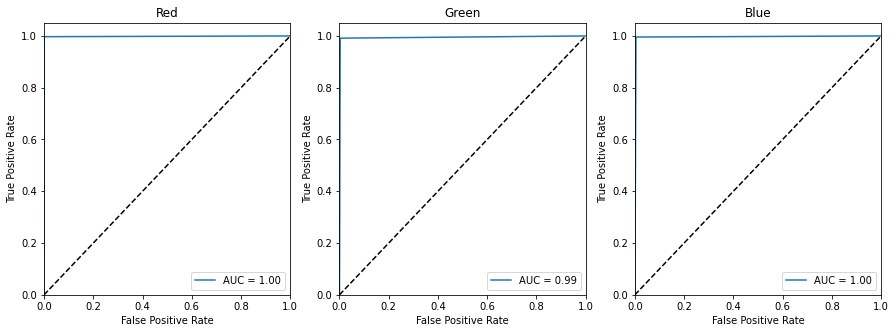

roc_auc_score:  0.9960826210826211


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2]
y_test = label_binarize(y_test, classes=labels)
y_pred = label_binarize(predict_labels, classes=labels)

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='AUC = %0.2f' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if idx == 0:
      plt.title('Red')
    elif idx == 1:
      plt.title('Green')
    elif idx == 2:
      plt.title('Blue')
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test, y_pred, multi_class='raise'))

In [ ]:
# save and load model
import joblib

joblib.dump(best_decisiontree, "best_decisiontree.pkl")

# check load model
load_decisiontree = joblib.load("best_decisiontree.pkl")

## 7. Predict Orange Pi data

In [ ]:
# 실험 데이터 가공하기
experiment_tmp = glob('./*.png')
print(len(experiment_tmp))

experiment_list = []
experiment_image = []
experiment_raw=[]
for img in experiment_tmp:
    img = load_img(img)
    img = img_to_array(img).astype('float32')/255

    y = 96
    h = 128
    x = 56
    w = 128
    crop_img = img[y: y + h, x: x + w]
    experiment_image.append(np.array(crop_img))

    red_avg = np.mean(crop_img[:, :, 0])
    green_avg = np.mean(crop_img[:, :, 1])
    blue_avg = np.mean(crop_img[:, :, 2])

    experiment_list.append(np.array([red_avg, green_avg, blue_avg]))

experiment_data = np.array(experiment_list) # red label = 0
experiment_image = np.array(experiment_image)

print(experiment_data.shape)
print(experiment_image.shape)

36
(36, 3)
(36, 128, 128, 3)


In [ ]:
predict_labels = load_decisiontree.predict(experiment_data)
print(predict_labels)
predict_labels.shape

[2. 2. 0. 2. 1. 0. 2. 2. 1. 0. 1. 1. 0. 0. 1. 2. 2. 2. 2. 0. 1. 2. 1. 0.
 2. 2. 2. 1. 2. 0. 1. 2. 1. 0. 1. 2.]


(36,)

In [ ]:
len(experiment_image)

36

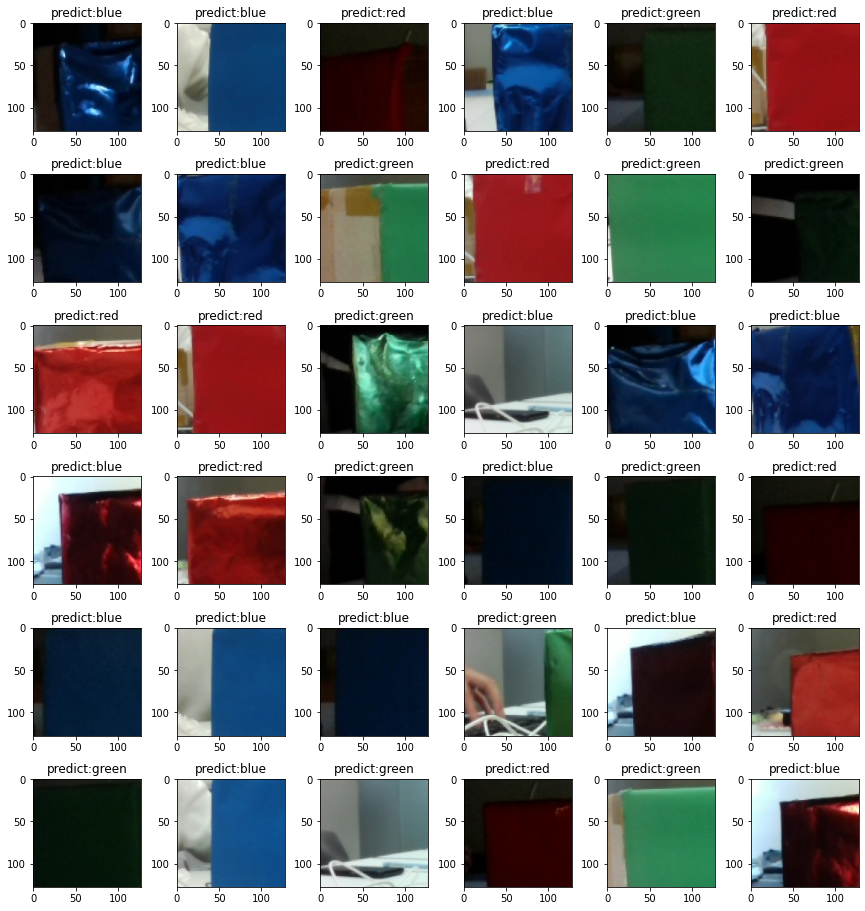

In [ ]:
plt.figure(figsize=(15,15))
for i in range(36):
  plt.subplot(6,6,i+1)
  if predict_labels[i] == 0:
    predict_colors = 'red'
  elif predict_labels[i] == 1:
    predict_colors = 'green'
  elif predict_labels[i] == 2:
    predict_colors = 'blue'
  else :
    predict_colors = 'none'

  plt.title("predict:%s"%predict_colors)
  plt.imshow(experiment_image[i])
  plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)

plt.show()